# Final Project

#### Provide a clear, written introduction to your topic (at least 250 words)


On the 2nd of October 2021, race car driver Brandon Brown was crowned champion of the NASCAR Xfinity Series Sparks 300 race at the Talladega Superspeedway. During his victory lap, the crowd began to chant “F*** Joe Biden”, which was unsurprising given the strong conservative presence at NASCAR events. As an NBC Sports Reporter began interviewing him, the chants continued to grow louder, prompting her to remark, “You can hear the chants from the crowd, Lets Go Brandon!”. Little did she know, this simple mistake would be the start of the viral phenomenon known as #LetsGoBrandon (Long, 2021).

Conservatives immediately seized upon the mistranslation, citing it as an example of mainstream media engaging in censorship for the sake of political correctness. The current polarized political environment provided fertile ground for this accusation to take root. The interview went viral, and the phrase “Lets Go Brandon” began to be used as a substitute for “F** Joe Biden”, with the mistranslation adding a layer of satire atop the original’s crude message.  Conservative influencers soon began using the hashtag as well, conventionalizing its meaning amongst the wider base.

Identifying the factors that drive this hashtag’s popularity would provide insight into the replication of cultural patterns amongst conservatives. Hence, for my project, I investigate the use of #LetsGoBrandon as a sign-vehicle of political opposition to the current US President, Joseph R Biden Jr. I first begin by defining culture and presenting my case for why I believe the use of the hashtag constitutes a conventionalized patter. I then interpret the hashtag’s replication using Peirce’s semiotic framework and employ computational methods to assist me in my interpretation. My task here is to identify the arguments that drive the legisign’s replication, deriving insights that can be applied to other viral political trends. Finally, I present my findings before ending with a conclusion. 

#### Demonstrate that you have identified a cultural pattern, clearly defining what you mean by "Culture," and why the signs you are studying belong to a conventionalized pattern.

I define culture as a social practice, in this case, the practice of using the hashtag to convey political opposition to Joe Biden (Tomasello, 1999). A social practice is any behaviour that has a social function. In this case, using the hashtag on a public platform such as Twitter has two social purposes. First, it signals in-group identification with other conservatives and second, it differentiates between the user and others who do not share the same political beliefs as them. The latter is often engaged in with the deliberate intent of eliciting a negative counter-reaction. Both these purposes are distinctly political, thus allowing the use of the hashtag to serve as a form of political expression.

This practice is a conventionalized cultural pattern because before this NASCAR event, the phrase “Lets Go Brandon” had no association with an individual’s political views. Its conventionalization as a stand-in for “F*** Joe Biden” was achieved via the confluence of three factors. The first is the presence of conservative personalities with substantial Twitter followings who could influence their fans to use the hashtag in the same way. The second is Twitter’s algorithms which are designed to promote viral topics, thus creating a positive feedback loop. And the third is the wider politically charged environment in the United States, allowing events such as this to quickly gain salience amongst the politically engaged segment of the population.

The evidence supports my arguments. The hashtag has been used, liked, and retweeted over 400, 000 times since the NASCAR event. It has been the subject of numerous articles by news agencies and has even been mentioned by politicians themselves (Long, 2021). The scale of its impact has concretized the phrase’s status as a marker of opposition to Joe Biden and the Democratic Party. I thus believe that I have identified a conventionalized cultural pattern.

#### Identify the sign relations of the sign(s) you are studying in Peircean language, along with information about the object, sign-vehicle, and interpretant. 

As mentioned in Assignment 1, the #LetsGoBrandon hashtag is an argument symbolic legisign, with each use of the hashtag being a sinsign instantiation of the original legisign. The sign-vehicle is the words “lets”, “go” and “brandon” strung together in a single hashtag. The object of the sign-vehicle is political opposition to Joe Biden with an added satirical element arising from the erroneous translation.

The hashtag signifies its object by serving as a symbol since the words are meaningless without the convention of using #LetsGoBrandon to ridicule the president. The hashtag is interpreted together with an accompanying post that will articulate an argument for the user’s political opposition. For example, this might be the attributing of rising gas prices or increased crime to the policy choices of the Biden administration.

And finally, the broader convention of using the hashtag in a political context, as a means of identification with conservatives and differentiation from liberals, makes the sign-vehicle a legisign. Its signifying element is this convention and each replication allows the user to leverage this convention and its associated argument to express their political views.

#### Write at least 1000 words explaining your interpretation/prediction and how/why your approach is an effective way to interpret/predict the cultural pattern that you identified. Include information on how the sign conventions you're studying are maintained and which cultural group(s) they are relevant to.

I answer this section by simultaneously walking through my code and providing descriptions and analysis along the way.

# Code: Analysing Tweets Containing #LetsGoBrandon

## Step 1: Import Packages, Load Data, and Clean Data

### 1.1 Import Packages

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import nltk
from gensim import corpora, models
from gensim.utils import effective_n_jobs
from collections import Counter
import pyLDAvis
import pyLDAvis.gensim_models
import datetime
import statsmodels.formula.api as smf
import collections
import seaborn as sn
import util

### 1.2 Load and Merge json Files Containing Tweets

In [4]:
json_files = [f for f in os.listdir("Data/") if "json" in f]
df_ls = []    

for filename in json_files:
    df_ls.append(pd.read_json("Data/" + filename,
                              lines=True))
    
lgb_tweets = pd.concat(df_ls)

len(lgb_tweets)

379090

### 1.3 Data Cleaning

In [6]:
#Remove unnecessary hashtags, mentions, hyperlinks etc.
remove_rt = lambda x: re.sub(r"RT @\w+: "," ",x)
rt = lambda x: re.sub(r"@\S+|\n|#\S+|http\S+|\W|[^\x00-\x7F]+|\d+"," ",x)
lgb_tweets["tweet"] = lgb_tweets.tweet.map(remove_rt).map(rt)

#Remove duplicate tweets
lgb_tweets["tweet"] = lgb_tweets.tweet.str.lower()
lgb_tweets = lgb_tweets.drop_duplicates(subset = "tweet")

len(lgb_tweets)

234802

My first step in my interpretation of this pattern is to collect the relevant data. I first scrape all tweets from the date of the NASCAR event containing the hashtag #LetsGoBrandon. After removing duplicates and cleaning the data, I am left with 234,802 tweets. These records might not be exhaustive since Twint did crash several times whilst scraping tweets, causing me to stop and start the process at different dates. 

## Step 2: Data Exploration

### 2.1 Plot most frequent hashtags

<AxesSubplot:xlabel='Hashtag'>

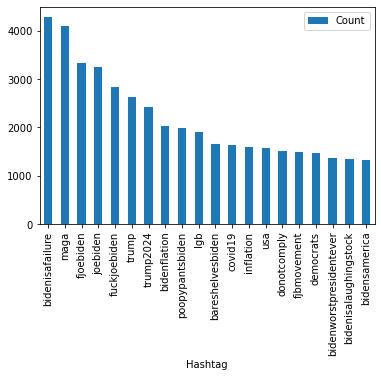

In [14]:
hashtag_dict = util.metadata_extractor(lgb_tweets["hashtags"])
hashtag_df = pd.DataFrame(hashtag_dict.items(), columns = ["Hashtag", "Count"])
hashtag_df = hashtag_df.sort_values(by="Count", ascending=False)
hashtag_df[4:24].plot.bar(x="Hashtag", y="Count")

### 2.2 Plot most frequent mentions

<AxesSubplot:xlabel='Mentions'>

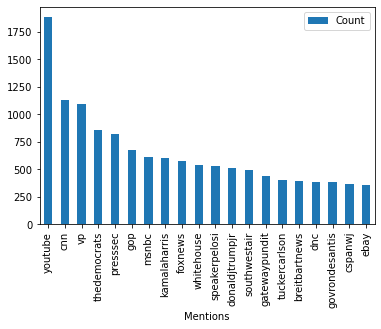

In [13]:
mentions = util.mentions_extractor(lgb_tweets["mentions"])
mention_df = pd.DataFrame(mentions.items(), columns = ["Mentions", "Count"])
mention_df = mention_df.sort_values(by="Count", ascending=False)
mention_df[2:22].plot.bar(x="Mentions", y="Count")

My second step is to explore the data and determine if the patterns observed in Assignment 2 with a smaller subset of tweets still hold here. I identify and plot the 20 most common hashtags and mentions used alongside #LetsGoBrandon to determine if the hashtag is used to indicate political opposition to the current president. My findings support my earlier work, with hashtags such as #fjbiden and #bidenisafailure indicating that the sign-vehicle is used as a substitute for “F** Joe Biden” and to criticise Biden respectively. Mentions also frequently tag accounts that are primarily political such as Tucker Carlson and Kamala Harris. Users are likely expressing support for conservative personalities whilst simultaneously denigrating Democratic politicians online.

## Step 3: Trends in Legisign Replication over Time

Text(0.5, 1.0, 'Number of Tweets per Day')

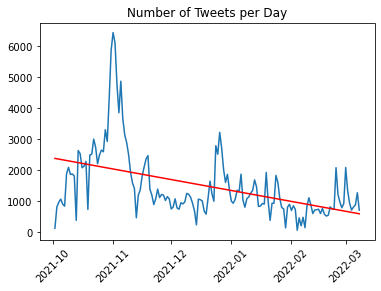

In [16]:
#time series of number of tweets over time
tw_cts = lgb_tweets.groupby("date")["tweet"].agg("count")
tw_cts = tw_cts.to_frame()
tw_cts.reset_index(inplace=True)
tw_cts.head()

X = np.array(tw_cts.index)
Y = np.array(tw_cts["tweet"])
theta = np.polyfit(X, Y, 1)
y_line = theta[1] + theta[0] * X

plt.plot(tw_cts["date"], Y)
plt.plot(tw_cts["date"], y_line, 'r')
plt.xticks(rotation=45)
plt.title("Number of Tweets per Day")

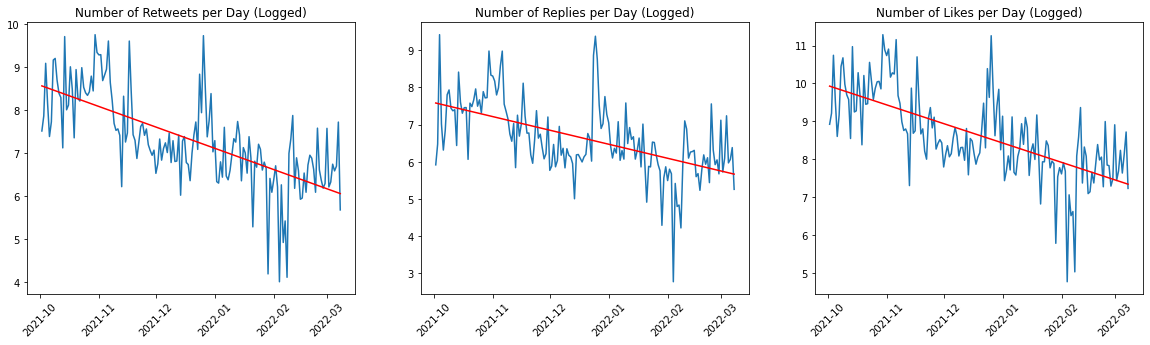

In [17]:
#repeat for retweets, likes, favourites
columns = [("retweets_count", "Number of Retweets per Day (Logged)"),
           ("replies_count", "Number of Replies per Day (Logged)"),
           ("likes_count", "Number of Likes per Day (Logged)")]

fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20, 5)

c = 0

for col, colname in columns:
    tw_cts = lgb_tweets.groupby("date")[col].agg("sum")
    tw_cts = tw_cts.to_frame()
    tw_cts.reset_index(inplace=True)
    X = np.array(tw_cts.index)
    Y = np.array(tw_cts[col])
    Y = np.log(Y)
    theta = np.polyfit(X, Y, 1)
    y_line = theta[1] + theta[0] * X
    axs[c].plot(tw_cts["date"], Y)
    axs[c].plot(tw_cts["date"], y_line, 'r')
    axs[c].set_title(colname)
    axs[c].tick_params(axis='x', labelrotation=45)
    c += 1

My third step is to move beyond the scope of Assignment 2 and observe trends in legisign replication. I generate several time-series plots demonstrating variations in the number of tweets, retweets, favourites, and replies since October 2nd. My plots and best fit lines indicate that the use of the hashtag peaked in November, before settling into a gradual decline. This decline is routinely interrupted by smaller peaks in replication, most likely in response to external events that conservatives can attribute to Biden’s poor leadership. For example, there is a peak in tweets and retweets in January, which coincides with rising inflation rates. Conservative users may be responding to this negative economic outcome by blaming the president. To validate these claims I perform further analysis.

## Step 4: Topic Modelling

As mentioned above, I aim to identify the factors driving variations in legisign replication. In my Peircian analysis, I identify the presence of arguments used to justify the user’s political opposition to Biden. To further analyse these arguments, my fourth step involves conducting a text analysis of the tweets in my dataset. I run a topic modelling algorithm on the lemmatized content of tweets and their associated bigrams. My coherence score plots lead me to select a model with 8 topics.

In [20]:
#Empty list for lemmas
lemmas_full = []

#Create Lemmas
lemmas = lgb_tweets["tweet"].apply(util.get_lemmas)

for i in lemmas:
    lemmas_full.extend(i)

len(lemmas_full)

2008391

I have 2,008,391 lemmas

In [22]:
#Generate bigrams
bigram = models.Phrases(lemmas, min_count=100)
bigram_mod = models.phrases.Phraser(bigram)
lemmas = [bigram_mod[doc] for doc in lemmas]

In [23]:
#Build Dictionary and Corpus
dictionary = corpora.Dictionary([i for i in lemmas])
bow_corpus = [dictionary.doc2bow(text) for text in lemmas]

In [102]:
#Build Model list
model_list, coherence_values = util.compute_coherence_values(dictionary=dictionary,
                                                             corpus=bow_corpus,
                                                             texts=lemmas,
                                                             start=2,
                                                             limit=20,
                                                             step=2)

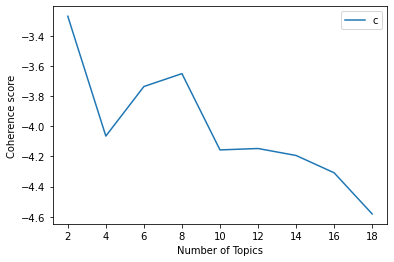

In [103]:
plt.plot(range(2, 20, 2), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

In [106]:
ldamodel = model_list[3]
for i, topic in ldamodel.show_topics(formatted=False, num_words=100, num_topics=8):
    print('Topic {}: \n{}'.format(i, [w[0] for w in topic]))

Topic 0: 
['get', 'covid', 'people', 'vaccine', 'mandate', 'child', 'work', 'border', 'kid', 'u', 'free', 'want', 'give', 'family', 'death', 'biden', 'stop', 'mask', 'vaccinate', 'kill', 'force', 'state', 'woman', 'need', 'law', 'money', 'government', 'american', 'via', 'take', 'vaccine_mandate', 'life', 'shot', 'die', 'test', 'make', 'come', 'fire', 'many', 'illegals', 'school', 'k', 'florida', 'protect', 'white', 'citizen', 'jab', 'right', 'drug', 'still', 'choice', 'gun', 'care', 'say', 'vax', 'illegal', 'business', 'city', 'virus', 'use', 'black', 'wall', 'unvaccinated', 'let', 'thousand', 'worker', 'pay', 'new', 'one', 'country', 'allow', 'keep', 'employee', 'blue', 'million', 'put', 'freedom', 'health', 'case', 'live', 'men', 'police', 'federal', 'southern_border', 'home', 'variant', 'spread', 'medical', 'sign', 'booster', 'tell', 'wear_mask', 'texas', 'illegal_immigrant', 'would', 'crime', 'comply', 'criminal', 'time', 'card']
Topic 1: 
['say', 'let', 'know', 'think', 'like', 'b

Topic 0 consists of words relevant to the COVID pandemic and immigration such as “covid”, “vaccine”, “mandate”, “southern border” and “illegal immigrant”. Topic 1 is less clear, with words seemingly indicating a mix of satire and open contempt for the president such as “lol”, “joke”, “hilarious” and “f*** joe”. 

Topic 2 indicates a presence of pro-Trump support and anti-Democrat opposition with words like “trump”, “republican”, “take”, “back” and “America”.   It seems that arguments justifying opposition to Joe Biden are secondary to users’ desire for Trump to be president again. Topic 3 touches on economics with words like “inflation” and “gas price”.

Topic 4 references foreign policy with words like “Ukraine”, “Russia”, “Putin” and “China”. Meanwhile, topic 5 has many positive words like “patriot”, “good morning” and “Christmas” which are most likely used to foster camaraderie between fellow conservatives on Twitter. 

Topic 6 takes a conspiratorial turn with words like “Fauci”, “paedophile” and “evil” possibly referencing the more radical beliefs of the conservative base. Finally, topic 7 consists of Spanish words and are most likely used by Spanish-speaking conservatives on the platform.

In [151]:
#save dataframe and lda model, do not run if you already have this file
lgb_tweets.to_csv("lgb_tweets_complete.csv")
ldamodel.save("lgb_lda_8.model")

In [24]:
#Load LDA Model
ldamodel = models.ldamodel.LdaModel.load("lgb_lda_8.model")

In [25]:
#Use pyLDAvis to explore distribution of topics
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(ldamodel, bow_corpus, dictionary)
p

C:\Users\thiya\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.097781 -0.008472       1        1  17.731757
2      0.108961 -0.004731       2        1  17.028057
3      0.069188 -0.070758       3        1  13.492724
0      0.048238  0.057228       4        1  13.075119
5      0.043856 -0.275602       5        1  11.925864
4      0.043293  0.200104       6        1  11.595811
6      0.053447  0.105008       7        1  10.115483
7     -0.464764 -0.002776       8        1   5.035184, topic_info=       Term          Freq         Total Category  logprob  loglift
285     say  16418.000000  16418.000000  Default  30.0000  30.0000
248     lie   5123.000000   5123.000000  Default  29.0000  29.0000
68      day   5664.000000   5664.000000  Default  28.0000  28.0000
100   today   4192.000000   4192.000000  Default  27.0000  27.0000
45      let  13084.000000  13084.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
1484      b    706.324752   1854.482447   Topic8  -4.9297   2.0234
418       v    423.669435    804.104916   Topic8  -5.4408   2.3479
103     die    578.668162   1773.979131   Topic8  -5.1290   1.8685
67    biden    754.097938  22188.013244   Topic8  -4.8642  -0.3931
60      usa    348.582163   1532.362233   Topic8  -5.6359   1.5080

[573 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
9981      2  0.989712     aaron
1207      6  0.998794   abandon
3617      6  0.065358  absolute
3617      7  0.931951  absolute
1         1  0.643363  actually
...     ...       ...       ...
785       7  0.997853       yep
366       1  0.694491       yes
366       2  0.210275       yes
366       3  0.094601       yes
366       4  0.000448       yes

[1346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1, 6, 5, 7, 8])

My pyLDAvis visualization shows a strong overlap between topics 0-6, with the largest congruence observed between topics 1 and 2. I then group tweets by day and weight each day’s worth of tweets according to the prevalence of each of these topics. 

In [26]:
#Fit Topic Weights, Takes a long time
lgb_tweets = lgb_tweets.apply(util.fill_topic_weights,
                              axis=1, args=[bow_corpus, ldamodel]).fillna(0)

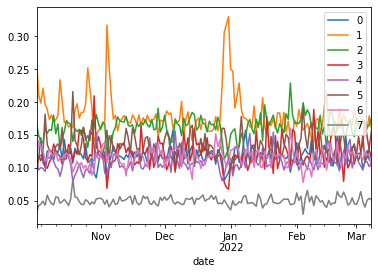

In [27]:
#Observe Change in Topic Weights over Time
lgb_tweets[['0','1','2','3','4','5','6','7','date']].groupby('date').mean().plot();

## Step 5: Regression Modelling

To test for statistical relationships between these topics and the broader legisign replication trend, I build four linear regression models with each topic as a predictor and the number of tweets, hashtags, replies and likes serving as the outcome respectively. To limit the confounding effect of temporal factors, I add dummy variables for each month as a control. Additionally, I also leave out topic 1 due to its large overlap in terms with topic 2.

### 5.1 Load Dataset if you have not done so

In [37]:
lgb_tweets_daily = pd.read_csv("lgb_tweets_complete.csv")

### 5.2 Aggregate Counts, Retweets, Likes, Replies by Day

In [38]:
lgb_tweets_daily = lgb_tweets_daily.groupby("date").agg({"tweet": [''.join, "count"],
                                                         "retweets_count": "sum",
                                                         "likes_count": "sum",
                                                         "replies_count": "sum"})
lgb_tweets_daily.columns = lgb_tweets_daily.columns.to_flat_index()
lgb_tweets_daily.rename(columns={('tweet', 'join'): "tweet",
                                 ('tweet', 'count'): "count",
                                 ('retweets_count', 'sum'): "retweets",
                                 ('likes_count', 'sum'): "likes",
                                 ('replies_count', 'sum'): "replies"},
                        inplace=True)
lgb_tweets_daily.reset_index(inplace=True)

### 5.3 Fit Topic Weights

In [40]:
#Fit Topic Weights for Tweets aggregated by date
#Different for earlier where we did each tweet individually
lgb_tweets_daily = lgb_tweets_daily.apply(util.fill_topic_weights,
                                          axis=1,
                                          args=[bow_corpus, ldamodel]).fillna(0)

### 5.4 Rename Columns

In [42]:
lgb_tweets_daily.rename(columns={"0": "Covid_Border",
                                 "1": "Satire",
                                 "2": "Pro_Trump_Anti_Democrat",
                                 "3": "Economy",
                                 "4": "Foreign_Policy_Anti_Socialism",
                                 "5": "Positive",
                                 "6": "Qanon",
                                 "7": "Spanish"},
                        inplace=True)

### 5.5 Create New Predictors

In [43]:
lgb_tweets_daily["month"] = lgb_tweets_daily["date"].apply(util.month_extractor)

### 5.6 Linear Regression Models

In [49]:
#Predicting Tweet Counts
mod = smf.ols(formula='count ~ Covid_Border + Pro_Trump_Anti_Democrat + Economy + Foreign_Policy_Anti_Socialism + Positive + Qanon + Spanish + C(month) - 1', data=lgb_tweets_daily)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     6.673
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.89e-09
Time:                        01:26:17   Log-Likelihood:                -1295.5
No. Observations:                 158   AIC:                             2617.
Df Residuals:                     145   BIC:                             2657.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(month)[1]   

In [50]:
#Predicting Retweets
mod = smf.ols(formula='retweets ~ Covid_Border + Pro_Trump_Anti_Democrat + Economy + Foreign_Policy_Anti_Socialism + Positive + Qanon + Spanish + C(month) - 1', data=lgb_tweets_daily)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     6.724
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.59e-09
Time:                        01:26:57   Log-Likelihood:                -1472.4
No. Observations:                 158   AIC:                             2971.
Df Residuals:                     145   BIC:                             3011.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(month)[1]   

In [51]:
#Predicting Likes
mod = smf.ols(formula='likes ~ Covid_Border + Pro_Trump_Anti_Democrat + Economy + Foreign_Policy_Anti_Socialism + Positive + Qanon + Spanish + C(month) - 1', data=lgb_tweets_daily)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     5.799
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           3.86e-08
Time:                        01:27:07   Log-Likelihood:                -1708.5
No. Observations:                 158   AIC:                             3443.
Df Residuals:                     145   BIC:                             3483.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(month)[1]   

In [52]:
#Predicting Replies
mod = smf.ols(formula='replies ~ Covid_Border + Pro_Trump_Anti_Democrat + Economy + Foreign_Policy_Anti_Socialism + Positive + Qanon + Spanish + C(month) - 1', data=lgb_tweets_daily)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                replies   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     3.643
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           8.76e-05
Time:                        01:27:17   Log-Likelihood:                -1388.9
No. Observations:                 158   AIC:                             2804.
Df Residuals:                     145   BIC:                             2844.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(month)[1]   

All resultant models have statistically significant adjusted r-squared values ranging from 0.168 to 0.304. Although each model has different topics that are statistically significant, only one, Pro_Trump_Anti_Democrat (topic 2), remains significant throughout. This indicates that beyond all the arguments, it is a mix of the pro-Trump and anti-Democratic party messaging that drives replication. Not content with these results, I engage in additional analysis to enrich my findings.

## Step 6: Moral Foundations Dictionary Analysis

For my sixth step, I employ the moral foundations dictionary by Graham et al (2009) which has been used to study differences in values between liberals and conservatives in the United States. The dictionary contains a set of words linked to a specific moral category, split between positive and negative expressions of that category. For example, words like “loyal” and “obey” indicate a positive view of authority whilst “rebel” and “disobey” will indicate the opposite.

### 6.1 Read in Dictionary and Process Data

In [54]:
#Read Dictionary
mfd_dict = util.readDict("mfd2.0.dic")

In [55]:
#Select Tweets
tweets = lgb_tweets_daily["tweet"]

In [58]:
#Weight each moral foundation
care_pos = tweets.apply(util.mfd_count, args = ["care.virtue", mfd_dict])
care_neg = tweets.apply(util.mfd_count, args = ["care.vice", mfd_dict])
fair_pos = tweets.apply(util.mfd_count, args = ["fairness.virtue", mfd_dict])
fair_neg = tweets.apply(util.mfd_count, args = ["fairness.vice", mfd_dict])
loyal_pos = tweets.apply(util.mfd_count, args = ["loyalty.virtue", mfd_dict])
loyal_neg = tweets.apply(util.mfd_count, args = ["loyalty.vice", mfd_dict])
auth_pos = tweets.apply(util.mfd_count, args = ["authority.virtue", mfd_dict])
auth_neg = tweets.apply(util.mfd_count, args = ["authority.vice", mfd_dict])
sanct_pos = tweets.apply(util.mfd_count, args = ["sanctity.virtue", mfd_dict])
sanct_neg = tweets.apply(util.mfd_count, args = ["sanctity.vice", mfd_dict])

In [59]:
lgb_mfd = pd.DataFrame({"Care_Pos": care_pos,
                        "Care_Neg": care_neg,
                        "Fair_Pos": fair_pos,
                        "Fair_Neg": fair_neg,
                        "Loyal_Pos": loyal_pos,
                        "Loyal_Neg": loyal_neg,
                        "Auth_Pos": auth_pos,
                        "Auth_Neg": auth_neg,
                        "Sanct_Pos": sanct_pos,
                        "Sanct_Neg": sanct_neg,
                        "date": lgb_tweets_daily["date"],
                        "month": lgb_tweets_daily["month"],
                        "count": lgb_tweets_daily["count"],
                        "retweets": lgb_tweets_daily["retweets"],
                        "likes": lgb_tweets_daily["likes"],
                        "replies": lgb_tweets_daily["replies"]})

### 6.2 Build Regression Models

In [60]:
#Predicting Tweet Counts
mod = smf.ols(formula='count ~ Care_Pos + Care_Neg + Fair_Pos + Fair_Neg + Loyal_Pos + Loyal_Neg + Auth_Pos + Auth_Neg + Sanct_Pos + Sanct_Neg + C(month) - 1', data=lgb_mfd)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     5.566
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           8.16e-09
Time:                        01:53:13   Log-Likelihood:                -1293.7
No. Observations:                 158   AIC:                             2619.
Df Residuals:                     142   BIC:                             2668.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2527.3323   1081.543      2.337   

In [61]:
#Predicting Retweets
mod = smf.ols(formula='retweets ~ Care_Pos + Care_Neg + Fair_Pos + Fair_Neg + Loyal_Pos + Loyal_Neg + Auth_Pos + Auth_Neg + Sanct_Pos + Sanct_Neg + C(month) - 1', data=lgb_mfd)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     5.598
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           7.17e-09
Time:                        01:53:16   Log-Likelihood:                -1470.7
No. Observations:                 158   AIC:                             2973.
Df Residuals:                     142   BIC:                             3022.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   3865.5399   3314.065      1.166   

In [62]:
#Predicting Likes
mod = smf.ols(formula='likes ~ Care_Pos + Care_Neg + Fair_Pos + Fair_Neg + Loyal_Pos + Loyal_Neg + Auth_Pos + Auth_Neg + Sanct_Pos + Sanct_Neg + C(month) - 1', data=lgb_mfd)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     4.804
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.82e-07
Time:                        01:54:51   Log-Likelihood:                -1707.0
No. Observations:                 158   AIC:                             3446.
Df Residuals:                     142   BIC:                             3495.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   1.992e+04   1.48e+04      1.347   

In [63]:
#predicting replies
mod = smf.ols(formula='replies ~ Care_Pos + Care_Neg + Fair_Pos + Fair_Neg + Loyal_Pos + Loyal_Neg + Auth_Pos + Auth_Neg + Sanct_Pos + Sanct_Neg + C(month) - 1', data=lgb_mfd)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                replies   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.945
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           0.000428
Time:                        01:55:16   Log-Likelihood:                -1388.3
No. Observations:                 158   AIC:                             2809.
Df Residuals:                     142   BIC:                             2858.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   4401.6237   1968.003      2.237   

I weight the frequency of these moral foundations across tweets grouped by day and use regression models to predict engagement. They reveal that a negative view of authority and words associated with a negative view of care (“suffer”, “cruel”, “harm”, etc.) remains statistically significant across all models. This ties in with Graham et al’s (2009) observation that conservatives displayed a stronger affinity for moral foundations that invoked issues of authority. Given #LetsGoBrandon’s convention of opposition to Biden, it is unsurprising that users would advocate against following his leadership, correlating it with increased harm and suffering for conservatives.

## Step 7: Joint Analysis

To see if these moral foundations are correlated with other topics, I build a correlation matrix containing the weights for these foundations and the weights for the LDA topics. The negative view of authority is not strongly correlated with any of my other topics but is moderately correlated with negative expressions of care. As a final step, I then integrate this moral foundation with my earlier set of LDA topic predictors. I obtain statistically significant results that demonstrate the centrality of pro-Trump support and opposition to any political faction not aligned with Trump’s politics to the spread of #LetsGoBrandon.

### 7.1 Data Preprocessing

In [64]:
#Merge dataframes
lgb_corr = pd.merge(lgb_tweets_daily, lgb_mfd, on=["date", "month", "count", "retweets", "likes", "replies"])

### 7.2 Correlation Matrix

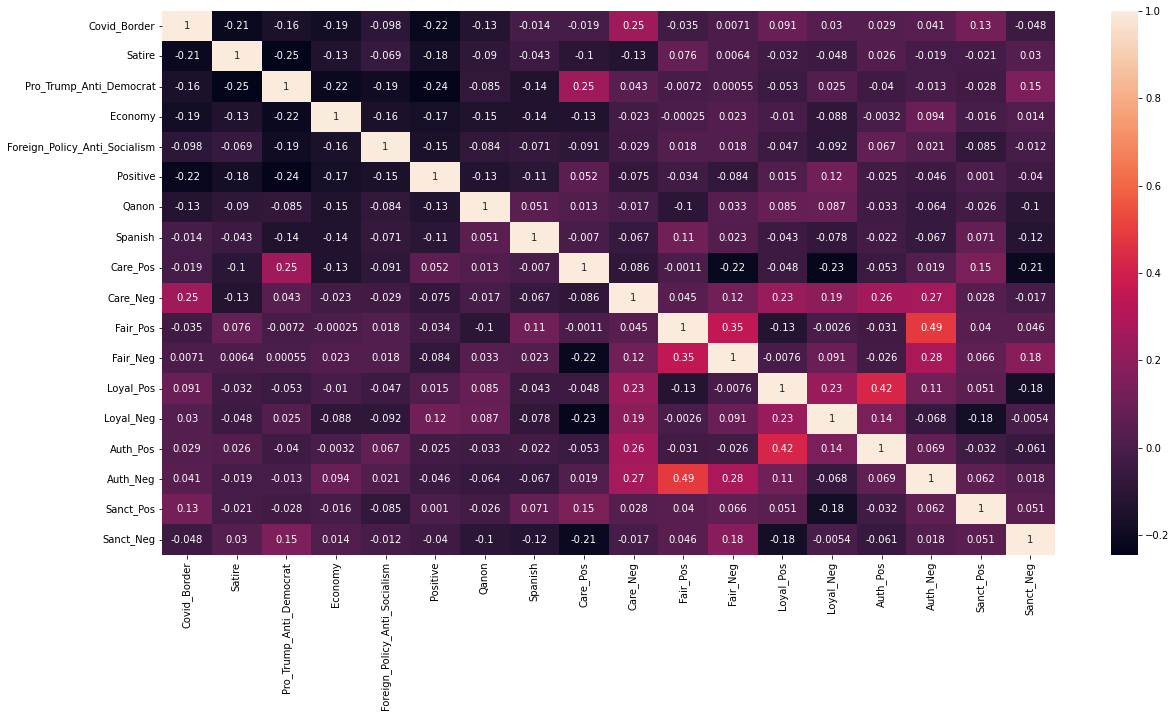

In [66]:
lgb_corrmatrix = lgb_corr.drop(columns=['count', 'date', 'likes', 'replies', 'retweets', 'tweet', 'month'])

fig, axs = plt.subplots()
fig.set_size_inches(20, 10)

corrMatrix = lgb_corrmatrix.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### 7.3 Combined Linear Regression

In [74]:
#Predicting Tweet Counts
mod = smf.ols(formula='count ~ Auth_Neg + Care_Neg + Covid_Border + Pro_Trump_Anti_Democrat + Economy + Foreign_Policy_Anti_Socialism + Positive + Qanon + Spanish + C(month) - 1', data=lgb_corr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     6.633
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           3.04e-10
Time:                        02:01:33   Log-Likelihood:                -1290.7
No. Observations:                 158   AIC:                             2611.
Df Residuals:                     143   BIC:                             2657.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(month)[1]   

Care_Neg, Auth_Neg and Pro_Trump_Anti_Democrat are all significantly correlated with the number of tweets generated each day with the hashtag. There is evidence of multicollinearity, likely due to Care_Neg and Auth_Neg. More importantly, the pro-trump messaging remains significantly correlated, holding other variables constant.

## Step 8: Results Analysis

My results demonstrate that legisign replication is driven by a desire for Donald Trump to have remained president over Joe Biden. This ties in with the larger conservative narrative of the 2020 elections being rigged, thus leading to calls for rebellion against Biden (Goidel et al, 2019). Arguments about rising inflation or the pandemic might be used to justify this opposition, but this justification is superficial. Conservatives simply attribute all negative outcomes to Biden and do the opposite for Trump. There is thus strong evidence of confirmation bias driving this legisign’s replication (Kahneman et al, 2011). 

The result is a conservative echo-chamber within the digital sphere of political behaviour, allowing users to engage in the production, consumption, and regulation of this cultural convention (du Gay et al., 2013). Members of the conservative in-group signify membership via support for the former president and differentiate themselves from the out-group by denigrating all political actors who they perceive to be opposed to the president such as Biden. Ultimately, #LetsGoBrandon is less about Biden and more about Trump. The sign conventions are sustained due to the conservative base' adulation of the former president.

I can also extend this inference to include other digital signs that are a part of conservative culture because Trump is likely to have played a part in them as well. His lasting appeal is a testament to the ability of charismatic leaders to leverage populist appeals to their advantage (Inglehart & Norris, 2019). Despite his billionaire status, Trump has struck a chord with the median conservative voter by directing deep-rooted feelings of anti-elitism against his political opponents. He did so by presenting himself as someone who possessed none of the features commonly associated with those who have cultivated “good taste” (Bourdieu, 1984). By using unsophisticated language and invoking jingoist appeals, the real estate mogul showed that he possessed none of the learned competencies commonly associated with the professionalized class of technocrats that had come to dominate government.

Trump was instead the everyman’s billionaire, someone who acted exactly the way the median voter felt he/she/they would if they were rich (Kivitso, 2017). The power of this parasocial relationship continues to persist, with conservative voters willing to doubt the authenticity of a legitimate election in a desire to have him maintain power. Thus, I interpret this cultural pattern as being the product of a cult of personality and reasonably assume that this factor is likely to drive other aspects of contemporary conservatism.

Additionally, it is also worth noting that Trump was banned from Twitter in 2017, a platform that often served as a primary means of communication between him and his fans (Ott, 2017). Invoking his name on the platform when engaging in sign replication, could also serve as a means of ensuring that he continues to remain relevant to mainstream political discourse. 

I can be confident in the validity of my findings given my comprehensive collection of tweets and statistically significant results. This is possible due to the computational techniques employed that allow for the large-scale analysis demonstrated above (Manovich, 2020).  Through topic modelling, I was able to identify how pro-Trump rhetoric was the main factor driving the political opposition to Biden as opposed to specific policy arguments. My results are supported by studies of other conservative communities online that also identify the ability of influential modern conservatives to leverage populist sentiments to their advantage (Finlayson, 2021). 

#### Include a conclusion that summarizes your findings and explains their Social Science significance in the study of culture (at least 250 words)

In summary, my findings demonstrate that the #LetsGoBrandon hashtag is primarily driven by support for former president Donald Trump and this support entails opposition to the Democratic party which is aligned against him. I attribute this support to the cult of personality Trump has fostered, allowing him to create an echo chamber around him for his supporters to engage in legisign replication. This echo chamber can be interpreted using the circuit of culture framework.

The hashtag’s production, regulation and consumption are the domain of conservatives and #LetsGoBrandon has become conventionalized as a part of conservative political culture. I argue that since support for Trump has become increasingly central to the conservative base, we are likely to see similar patterns in other sign-vehicles signifying conservative political positions.

These findings have important implications for the study of political culture online and political communication. It reveals that underneath conventional norms of interest articulation and policy preferences, voters’ preferences are still guided by partisan allegiances to an extent. These preferences are then justified retroactively through policy platforms. It is unclear how these preferences are formed and likely that this process takes place outside the digital realm.

For future work, I can map out the social network of mentions across tweets to identify key users involved in the replication of this legisign. Additionally, I could also construct complex contagion models to simulate the spread of this hashtag and deploy it in predicting the evolution of other digital signs.

#### Bibliography

Bourdieu, P. (1984). A social critique of the judgement of taste. Traducido del francés por R. Nice. Londres, Routledge.

Du Gay, Paul, Stuart Hall, Linda Janes, Anders Koed Madsen, Hugh Mackay, and Keith Negus. Doing cultural studies: The story of the Sony Walkman. Sage, 2013.

Finlayson, A. (2021). Neoliberalism, the Alt-Right and the Intellectual Dark Web. Theory, Culture & Society, 38(6), 167-190.

Goidel, K., Gaddie, K., & Goidel, S. (2019). Rigged-election rhetoric: Coverage and consequences. PS: Political Science & Politics, 52(2), 229-238.

Graham, J., Haidt, J., & Nosek, B. A. (2009). Liberals and conservatives rely on different sets of moral foundations. Journal of personality and social psychology, 96(5), 1029.

Inglehart, R. F., & Norris, P. (2016). Trump, Brexit, and the rise of populism: Economic have-nots and cultural backlash.

Kahneman, D., Lovallo, D., & Sibony, O. (2011). Before you make that big decision.

Kivisto, P. (2017). The Trump phenomenon: How the politics of populism won in 2016. Emerald Group Publishing.

Long, C. (2021, October 30). How 'let's go Brandon' became code for insulting Joe Biden. AP NEWS. Retrieved January 26, 2022, from https://apnews.com/article/lets-go-brandon-what-does-it-mean-republicans-joe-biden-ab13db212067928455a3dba07756a160

Manovich, L. (2020). Cultural analytics. MIT Press.

Ott, B. L. (2017). The age of Twitter: Donald J. Trump and the politics of debasement. Critical studies in media communication, 34(1), 59-68.

Tomasello, M. (1999). The human adaptation for culture. Annual review of anthropology, 28(1), 509-529.